Cluster 1 Data Points:
[52.   6.4  3.2  4.5  1.5]
[53.   6.9  3.1  4.9  1.5]
[54.   5.5  2.3  4.   1.3]
[55.   6.5  2.8  4.6  1.5]
[56.   5.7  2.8  4.5  1.3]
[57.   6.3  3.3  4.7  1.6]
[58.   4.9  2.4  3.3  1. ]
[59.   6.6  2.9  4.6  1.3]
[60.   5.2  2.7  3.9  1.4]
[61.   5.   2.   3.5  1. ]
[62.   5.9  3.   4.2  1.5]
[63.   6.   2.2  4.   1. ]
[64.   6.1  2.9  4.7  1.4]
[65.   5.6  2.9  3.6  1.3]
[66.   6.7  3.1  4.4  1.4]
[67.   5.6  3.   4.5  1.5]
[68.   5.8  2.7  4.1  1. ]
[69.   6.2  2.2  4.5  1.5]
[70.   5.6  2.5  3.9  1.1]
[71.   5.9  3.2  4.8  1.8]
[72.   6.1  2.8  4.   1.3]
[73.   6.3  2.5  4.9  1.5]
[74.   6.1  2.8  4.7  1.2]
[75.   6.4  2.9  4.3  1.3]
[76.   6.6  3.   4.4  1.4]
[77.   6.8  2.8  4.8  1.4]
[78.   6.7  3.   5.   1.7]
[79.   6.   2.9  4.5  1.5]
[80.   5.7  2.6  3.5  1. ]
[81.   5.5  2.4  3.8  1.1]
[82.   5.5  2.4  3.7  1. ]
[83.   5.8  2.7  3.9  1.2]
[84.   6.   2.7  5.1  1.6]
[85.   5.4  3.   4.5  1.5]
[86.   6.   3.4  4.5  1.6]
[87.   6.7  3.1  4.7  1.5]
[88. 

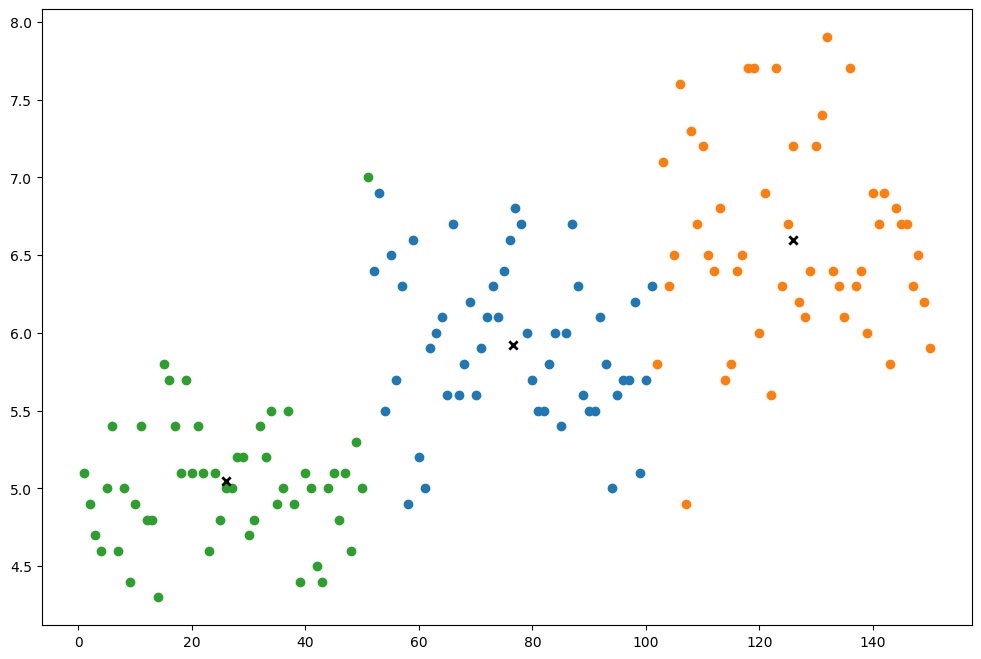

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
    def __init__(self, K=5, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
                break
        return self._get_cluster_labels(self.clusters), self.clusters

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            points = self.X[index]
            ax.scatter(points[:, 0], points[:, 1])
        for point in self.centroids:
            ax.scatter(point[0], point[1], marker="x", color="black", linewidth=2)
        plt.show()


# Load the Iris dataset from CSV
data = pd.read_csv('Iris.csv')
X = data.iloc[:, :-1].values  # features

# Use KMeans with K=3 (since there are three classes in Iris dataset)
kmeans = KMeans(K=3, max_iters=100)
cluster_labels, clusters = kmeans.predict(X)

# Print data points of each cluster
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1} Data Points:")
    for idx in cluster:
        print(X[idx])
    print("="*30)

# Visualize the final clustering
kmeans.plot()
